In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def missing_values_table(df):
    # Number of missing values
    missing_val = df.isnull().sum()
    # Percentage of missing values
    missing_per = 100*df.isnull().sum()/len(df)
    missing_val_table = pd.concat([missing_val,missing_per],axis=1)
    missing_val_table_columns = missing_val_table.rename(columns={0 : 'Missing Values',1 : '% of Missing Values'})
    missing_val_table_columns = missing_val_table_columns[missing_val_table_columns.iloc[:,1] != 0].sort_values('% of Missing Values',ascending=False).round(1)
    return missing_val_table_columns

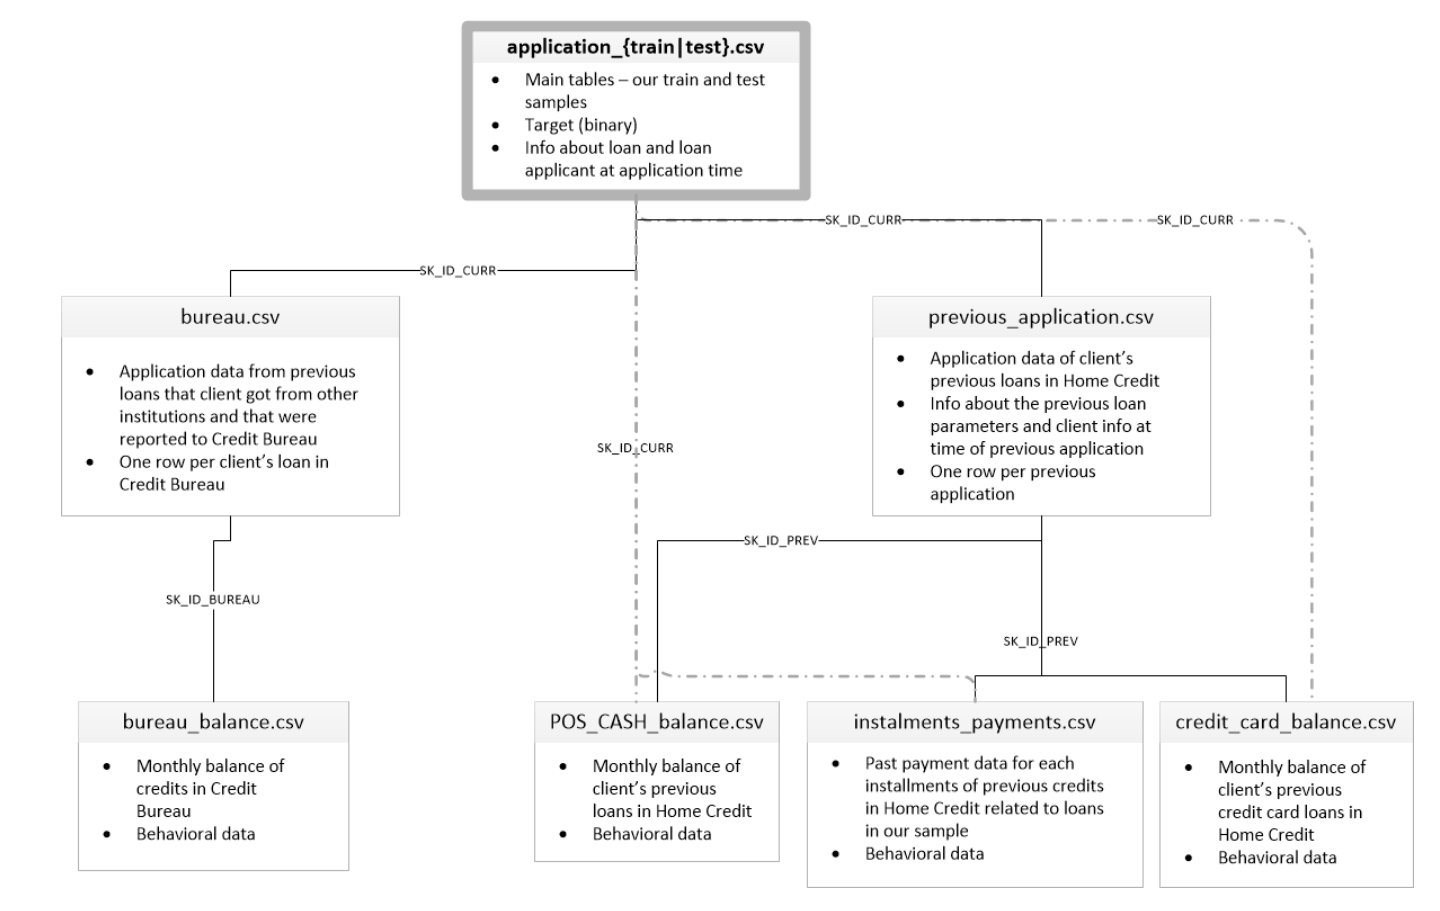

**application data**

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
APP_Train = pd.read_csv("/content/drive/MyDrive/AN8002 Team 3/dataset/application_train.csv")

1.Data Quality Checking

data format content, remove spaces, special symbol

In [ ]:
APP_Train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,aou6ud,0,Cash loans,M,N,Y,0,360000.0,1125000.0,33025.5,1125000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.022800,-18943,-7369,-2353.0,-2479,NaN,1,1,0,1,0,0,Managers,2.0,2,2,WEDNESDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,xxbaad,0,Cash loans,F,N,Y,0,112500.0,251280.0,13630.5,180000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.022625,-13894,-1393,-5698.0,-5698,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1645.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
2,xdrbad,0,Cash loans,F,N,Y,0,225000.0,544491.0,15916.5,454500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.035792,-19821,-2075,-2121.0,-3379,NaN,1,1,1,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,...,0.0641,0.0476,0.0078,0.0100,reg oper account,block of flats,0.0563,Panel,No,0.0,0.0,0.0,0.0,-1062.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
3,rbdd7d,0,Cash loans,F,N,N,2,211500.0,900000.0,26316.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006207,-13034,-2205,-1193.0,-4141,NaN,1,1,1,1,0,0,Laborers,4.0,2,2,THURSDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-484.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,90000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-18393,-1694,-8279.0,-1890,NaN,1,1,1,1,0,0,Sales staff,2.0,3,3,SATURDAY,12,0,0,0,0,0,0,...,0.3249,0.5061,0.0233,0.0357,reg oper account,block of flats,0.4617,Panel,No,3.0,0.0,3.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [ ]:
APP_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199882 entries, 0 to 199881
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(17)
memory usage: 186.0+ MB


2.Data Logic Checking

SK_ID_CURR is the unique id in trainset

In [ ]:
print("Check that SK_ID_CURR is indeed a primary key")
print()
print("APP_Train.len",len(APP_Train))
print("APP_Train.SK_ID_CURR.nunique",APP_Train.SK_ID_CURR.nunique())

Check that SK_ID_CURR is indeed a primary key

APP_Train.len 199882
APP_Train.SK_ID_CURR.nunique 199882


3. Missing Value Processing

In [ ]:
# Replace null with np.nan
APP_Train.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)

In [ ]:
pd.set_option("display.max_rows",None)
print("Display train data missing values")
print()
print(missing_values_table(APP_Train))

Display train data missing values

                              Missing Values  % of Missing Values
COMMONAREA_MEDI                       139817                 69.9
COMMONAREA_AVG                        139817                 69.9
COMMONAREA_MODE                       139817                 69.9
NONLIVINGAPARTMENTS_MEDI              138850                 69.5
NONLIVINGAPARTMENTS_MODE              138850                 69.5
NONLIVINGAPARTMENTS_AVG               138850                 69.5
FONDKAPREMONT_MODE                    136876                 68.5
LIVINGAPARTMENTS_MODE                 136707                 68.4
LIVINGAPARTMENTS_MEDI                 136707                 68.4
LIVINGAPARTMENTS_AVG                  136707                 68.4
FLOORSMIN_MODE                        135783                 67.9
FLOORSMIN_MEDI                        135783                 67.9
FLOORSMIN_AVG                         135783                 67.9
YEARS_BUILD_MODE                      133

In [ ]:
print("Counts per target category")
print()
print(APP_Train.TARGET.value_counts())
print()
print("Proportion of minority to majority target class")
print()
print(APP_Train.TARGET.value_counts()[1]/APP_Train.TARGET.value_counts()[0])

Counts per target category

0    183651
1     16231
Name: TARGET, dtype: int64

Proportion of minority to majority target class

0.08837958954756577


This is an imbalanced dataset with too many missing values. Since Finally we would preserve the proportion of target 0 to 1. Try to calculate missing values by rows to remove rows to reduce missing value rate.

In [ ]:
APP_Train_NAN_TARGET1 = pd.DataFrame(data=APP_Train[APP_Train.TARGET==1].isnull().sum(axis=1),columns=['num'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef5ea3be10>]],
      dtype=object)

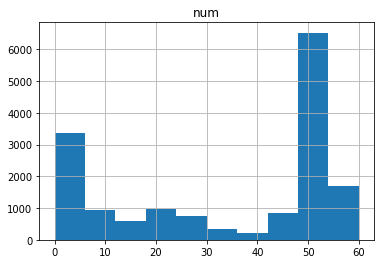

In [ ]:
APP_Train_NAN_TARGET1.hist()

In [ ]:
APP_Train_NAN_TARGET0 = pd.DataFrame(data=APP_Train[APP_Train.TARGET==0].isnull().sum(axis=1),columns=['num'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef5e9a0668>]],
      dtype=object)

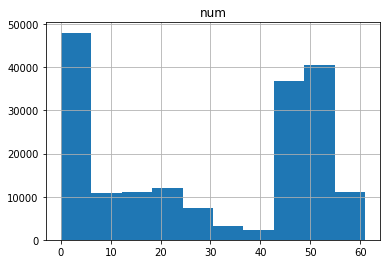

In [ ]:
APP_Train_NAN_TARGET0.hist()

In [ ]:
for i in np.arange(0,60):
    for j in np.arange(0,60):
        if round(int(APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=i].count())/int(APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=j].count()),5) == 0.08838:
            print("Max number on NAN for target 1:",i,"Max number on NAN for target 0:",j,"Proportion of minority to majority target class:",float(APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=i].count()/APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=j].count()))
        else:
            pass

Max number on NAN for target 1: 19 Max number on NAN for target 0: 15 Proportion of minority to majority target class: 0.08838408725074735
Max number on NAN for target 1: 58 Max number on NAN for target 0: 58 Proportion of minority to majority target class: 0.08837561405993007
Max number on NAN for target 1: 59 Max number on NAN for target 0: 59 Proportion of minority to majority target class: 0.08838473225906583


In [ ]:
print("Number of remaining target 1 samples")
print()
print(APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=19].count())

Number of remaining target 1 samples

num    5381
dtype: int64


In [ ]:
print("Number of remaining target 0 samples")
print()
print(APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=15].count())

Number of remaining target 0 samples

num    60882
dtype: int64


In [ ]:
print("Check proportion is consistent")
print()
APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=19].count()/APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=15].count()

Check proportion is consistent



num    0.088384
dtype: float64

In [ ]:
# Subset row indices where target classs == 1 that have 19 or less NAN values
APP_Train_indexlist_TARGET1 = APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=19].index
# Subset row indices where target classs == 1 that have 15 or less NAN values
APP_Train_indexlist_TARGET0 = APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=15].index
# Consolidated row indices list
APP_Train_indexlist = APP_Train_indexlist_TARGET1.append(APP_Train_indexlist_TARGET0)

In [ ]:
# Select rows according to index
APP_Train_Cleaned_New = APP_Train.iloc[APP_Train_indexlist,:]
APP_Train_Cleaned_New.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
4,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,90000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-18393,-1694,-8279.0,-1890,NaN,1,1,1,1,0,0,Sales staff,2.0,3,3,SATURDAY,12,0,0,0,0,0,0,...,0.3249,0.5061,0.0233,0.0357,reg oper account,block of flats,0.4617,Panel,No,3.0,0.0,3.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
98,e6brd7,1,Cash loans,M,N,Y,1,135000.0,755190.0,32125.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020713,-11637,-982,-587.0,-930,NaN,1,1,0,1,0,0,Laborers,3.0,3,2,TUESDAY,12,0,0,0,0,0,0,...,0.1274,0.1743,0.0155,0.0139,reg oper account,block of flats,0.1578,Panel,No,1.0,0.0,1.0,0.0,-815.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
163,abrxr7,1,Cash loans,F,N,Y,0,202500.0,668304.0,28444.5,540000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-17855,-507,-5844.0,-1349,NaN,1,1,0,1,0,0,Laborers,1.0,3,3,TUESDAY,12,0,0,0,0,0,0,...,NaN,0.3627,NaN,0.0585,NaN,block of flats,0.3205,Panel,No,3.0,1.0,3.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
177,oooudx,1,Cash loans,F,N,N,0,67500.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.010556,-11448,-1066,-5217.0,-3955,NaN,1,1,1,1,1,0,NaN,2.0,3,3,THURSDAY,10,0,0,0,0,0,0,...,NaN,0.0144,NaN,0.0410,NaN,block of flats,0.0199,"Stone, brick",No,0.0,0.0,0.0,0.0,-938.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
254,br667r,1,Cash loans,M,N,Y,0,121500.0,772686.0,25056.0,553500.0,Family,Pensioner,Higher education,Married,House / apartment,0.006852,-20927,365243,-7404.0,-4415,NaN,1,0,0,1,0,0,NaN,2.0,3,3,WEDNESDAY,6,0,0,0,0,0,0,...,0.0941,0.1119,0.0000,0.0000,reg oper account,block of flats,0.0947,"Stone, brick",No,0.0,0.0,0.0,0.0,-1948.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Save to csv file (new), comment this out once done
# APP_Train_Cleaned_New.to_csv("application_train_cleaned_new.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def missing_values_table(df):
    # Number of missing values
    missing_val = df.isnull().sum()
    # Percentage of missing values
    missing_per = 100*df.isnull().sum()/len(df)
    missing_val_table = pd.concat([missing_val,missing_per],axis=1)
    missing_val_table_columns = missing_val_table.rename(columns={0 : 'Missing Values',1 : '% of Missing Values'})
    missing_val_table_columns = missing_val_table_columns[missing_val_table_columns.iloc[:,1] != 0].sort_values('% of Missing Values',ascending=False).round(1)
    return missing_val_table_columns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read csv file (new)
APP_Train_Cleaned_New = pd.read_csv("/content/drive/MyDrive/AN8002 Team 3/application_train_cleaned_new.csv")
APP_Train_Cleaned_New.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,4,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,90000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-18393,-1694,-8279.0,-1890,NaN,1,1,1,1,0,0,Sales staff,2.0,3,3,SATURDAY,12,0,0,0,0,0,...,0.3249,0.5061,0.0233,0.0357,reg oper account,block of flats,0.4617,Panel,No,3.0,0.0,3.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
1,98,e6brd7,1,Cash loans,M,N,Y,1,135000.0,755190.0,32125.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020713,-11637,-982,-587.0,-930,NaN,1,1,0,1,0,0,Laborers,3.0,3,2,TUESDAY,12,0,0,0,0,0,...,0.1274,0.1743,0.0155,0.0139,reg oper account,block of flats,0.1578,Panel,No,1.0,0.0,1.0,0.0,-815.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,163,abrxr7,1,Cash loans,F,N,Y,0,202500.0,668304.0,28444.5,540000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-17855,-507,-5844.0,-1349,NaN,1,1,0,1,0,0,Laborers,1.0,3,3,TUESDAY,12,0,0,0,0,0,...,NaN,0.3627,NaN,0.0585,NaN,block of flats,0.3205,Panel,No,3.0,1.0,3.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
3,177,oooudx,1,Cash loans,F,N,N,0,67500.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.010556,-11448,-1066,-5217.0,-3955,NaN,1,1,1,1,1,0,NaN,2.0,3,3,THURSDAY,10,0,0,0,0,0,...,NaN,0.0144,NaN,0.0410,NaN,block of flats,0.0199,"Stone, brick",No,0.0,0.0,0.0,0.0,-938.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
4,254,br667r,1,Cash loans,M,N,Y,0,121500.0,772686.0,25056.0,553500.0,Family,Pensioner,Higher education,Married,House / apartment,0.006852,-20927,365243,-7404.0,-4415,NaN,1,0,0,1,0,0,NaN,2.0,3,3,WEDNESDAY,6,0,0,0,0,0,...,0.0941,0.1119,0.0000,0.0000,reg oper account,block of flats,0.0947,"Stone, brick",No,0.0,0.0,0.0,0.0,-1948.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
APP_Train_Cleaned = APP_Train_Cleaned_New.copy().iloc[:,1:]
APP_Train_Cleaned.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,90000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-18393,-1694,-8279.0,-1890,NaN,1,1,1,1,0,0,Sales staff,2.0,3,3,SATURDAY,12,0,0,0,0,0,0,...,0.3249,0.5061,0.0233,0.0357,reg oper account,block of flats,0.4617,Panel,No,3.0,0.0,3.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
1,e6brd7,1,Cash loans,M,N,Y,1,135000.0,755190.0,32125.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020713,-11637,-982,-587.0,-930,NaN,1,1,0,1,0,0,Laborers,3.0,3,2,TUESDAY,12,0,0,0,0,0,0,...,0.1274,0.1743,0.0155,0.0139,reg oper account,block of flats,0.1578,Panel,No,1.0,0.0,1.0,0.0,-815.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,abrxr7,1,Cash loans,F,N,Y,0,202500.0,668304.0,28444.5,540000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-17855,-507,-5844.0,-1349,NaN,1,1,0,1,0,0,Laborers,1.0,3,3,TUESDAY,12,0,0,0,0,0,0,...,NaN,0.3627,NaN,0.0585,NaN,block of flats,0.3205,Panel,No,3.0,1.0,3.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
3,oooudx,1,Cash loans,F,N,N,0,67500.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.010556,-11448,-1066,-5217.0,-3955,NaN,1,1,1,1,1,0,NaN,2.0,3,3,THURSDAY,10,0,0,0,0,0,0,...,NaN,0.0144,NaN,0.0410,NaN,block of flats,0.0199,"Stone, brick",No,0.0,0.0,0.0,0.0,-938.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
4,br667r,1,Cash loans,M,N,Y,0,121500.0,772686.0,25056.0,553500.0,Family,Pensioner,Higher education,Married,House / apartment,0.006852,-20927,365243,-7404.0,-4415,NaN,1,0,0,1,0,0,NaN,2.0,3,3,WEDNESDAY,6,0,0,0,0,0,0,...,0.0941,0.1119,0.0000,0.0000,reg oper account,block of flats,0.0947,"Stone, brick",No,0.0,0.0,0.0,0.0,-1948.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
pd.set_option("display.max_rows",None)
print("Display train data missing values")
print()
print(missing_values_table(APP_Train_Cleaned))

Display train data missing values

                              Missing Values  % of Missing Values
OWN_CAR_AGE                            44241                 66.8
EXT_SOURCE_1                           35344                 53.3
OCCUPATION_TYPE                        20675                 31.2
EXT_SOURCE_3                           11925                 18.0
AMT_REQ_CREDIT_BUREAU_YEAR              7666                 11.6
AMT_REQ_CREDIT_BUREAU_HOUR              7666                 11.6
AMT_REQ_CREDIT_BUREAU_WEEK              7666                 11.6
AMT_REQ_CREDIT_BUREAU_DAY               7666                 11.6
AMT_REQ_CREDIT_BUREAU_MON               7666                 11.6
AMT_REQ_CREDIT_BUREAU_QRT               7666                 11.6
COMMONAREA_AVG                          6640                 10.0
COMMONAREA_MEDI                         6640                 10.0
COMMONAREA_MODE                         6640                 10.0
NONLIVINGAPARTMENTS_AVG                 5

The First two columns has too many missing values that had better remove.

In [ ]:
APP_Train_Cleaned = APP_Train_Cleaned[APP_Train_Cleaned.columns[~APP_Train_Cleaned.columns.isin(["OWN_CAR_AGE","EXT_SOURCE_1"])]]

4. Check Category/Continuous Values whether need to be cut into groups

In [ ]:
pd.set_option("display.max_columns",None)
APP_Train_Cleaned.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,90000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-18393,-1694,-8279.0,-1890,1,1,1,1,0,0,Sales staff,2.0,3,3,SATURDAY,12,0,0,0,0,0,0,Self-employed,0.062386,0.436506,0.3918,0.3193,0.9911,0.8776,0.0940,0.56,0.4828,0.3333,0.3750,0.3421,0.3194,0.4972,0.0232,0.0350,0.3992,0.3313,0.9911,0.8824,0.0949,0.5639,0.4828,0.3333,0.3750,0.3499,0.3489,0.5180,0.0233,0.0370,0.3955,0.3193,0.9911,0.8792,0.0946,0.56,0.4828,0.3333,0.3750,0.3481,0.3249,0.5061,0.0233,0.0357,reg oper account,block of flats,0.4617,Panel,No,3.0,0.0,3.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
1,e6brd7,1,Cash loans,M,N,Y,1,135000.0,755190.0,32125.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020713,-11637,-982,-587.0,-930,1,1,0,1,0,0,Laborers,3.0,3,2,TUESDAY,12,0,0,0,0,0,0,Electricity,0.617717,0.403142,0.1577,0.1062,0.9841,0.7824,0.0369,0.20,0.1724,0.3333,0.3750,0.0379,0.1252,0.1712,0.0154,0.0136,0.1607,0.1102,0.9841,0.7909,0.0373,0.2014,0.1724,0.3333,0.3750,0.0388,0.1368,0.1784,0.0156,0.0144,0.1593,0.1062,0.9841,0.7853,0.0372,0.20,0.1724,0.3333,0.3750,0.0386,0.1274,0.1743,0.0155,0.0139,reg oper account,block of flats,0.1578,Panel,No,1.0,0.0,1.0,0.0,-815.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,abrxr7,1,Cash loans,F,N,Y,0,202500.0,668304.0,28444.5,540000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-17855,-507,-5844.0,-1349,1,1,0,1,0,0,Laborers,1.0,3,3,TUESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.401645,0.574447,0.3175,0.2587,0.9851,0.7960,0.0508,0.36,0.3103,0.3333,0.0417,NaN,NaN,0.3563,NaN,0.0573,0.3235,0.2685,0.9851,0.8040,0.0512,0.3625,0.3103,0.3333,0.0417,NaN,NaN,0.3712,NaN,0.0607,0.3206,0.2587,0.985

In [ ]:
APP_Train_Cleaned.shape

(66263, 120)

Category Columns

In [ ]:
Categorical_List = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"]

In [ ]:
APP_Train_Cleaned_Categorical = APP_Train_Cleaned.loc[:,Categorical_List]

In [ ]:
def count_with_dictionary(list_):
    dictionary = {}
    for i in list_:
        if i in dictionary:
            dictionary[i] = dictionary[i] + 1
        else:
            dictionary[i] = 1
    return dictionary

In [ ]:
for i in list(APP_Train_Cleaned_Categorical.columns):
    if APP_Train_Cleaned_Categorical[i].dtypes == "O":
        dictionary = count_with_dictionary(list(APP_Train_Cleaned_Categorical[i]))
        list_of_lists = list(map(list,dictionary.items()))
        print(i)
        print(pd.DataFrame(list_of_lists,columns = ["Category","Count"]).sort_values(by = ["Count"],ascending = False))
        print()

NAME_CONTRACT_TYPE
          Category  Count
0       Cash loans  59367
1  Revolving loans   6896

CODE_GENDER
  Category  Count
0        F  44289
1        M  21972
2      XNA      2

FLAG_OWN_CAR
  Category  Count
0        N  44241
1        Y  22022

FLAG_OWN_REALTY
  Category  Count
0        Y  46620
1        N  19643

NAME_TYPE_SUITE
          Category  Count
0    Unaccompanied  54790
1           Family   7758
4  Spouse, partner   2168
3         Children    658
7          Other_B    339
5              NaN    279
2          Other_A    216
6  Group of people     55

NAME_INCOME_TYPE
               Category  Count
0               Working  32708
3  Commercial associate  17641
1             Pensioner  11498
2         State servant   4404
4            Unemployed      6
5           Businessman      4
6               Student      2

NAME_EDUCATION_TYPE
                        Category  Count
0  Secondary / secondary special  43612
1               Higher education  19510
2              Incomp

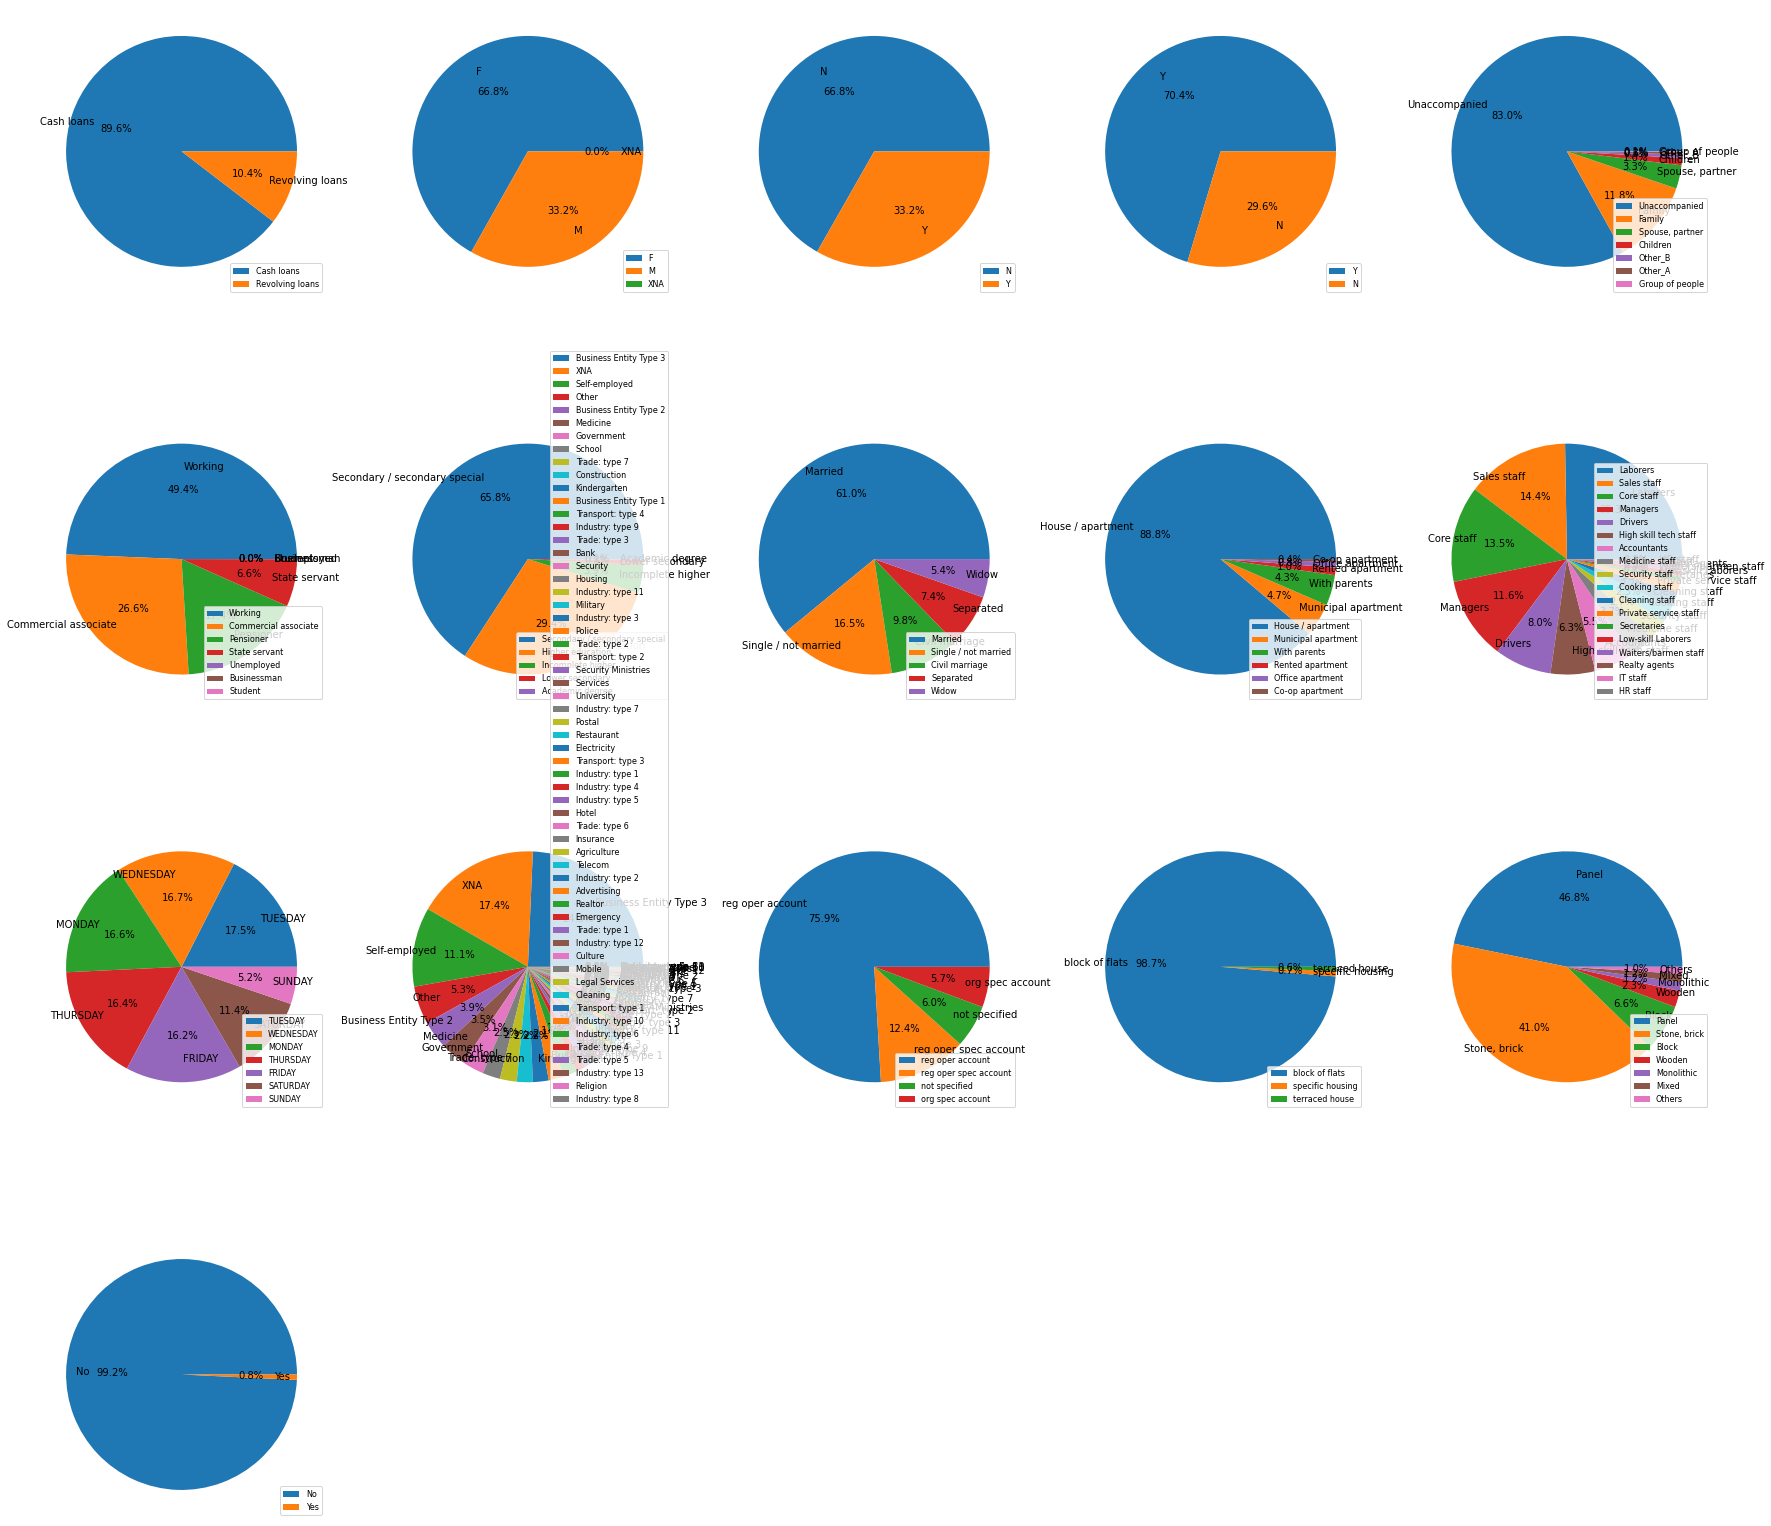

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig = plt.figure(figsize=(30,30))
for i in range(1,len(Categorical_List)+1):
    ax = fig.add_subplot(4,5,i)
    df0 = APP_Train_Cleaned_Categorical.loc[:,Categorical_List[i-1]]
    labels = df0.value_counts().index
    # print(Categorical_List[i-1])
    # print(labels)
    # labels=my_level_list(df0)
    sizes = df0.value_counts().values
    ax.pie(sizes,autopct='%1.1f%%',labels=labels,labeldistance=0.8)
    # labels=labels
    ax.legend(labels,loc='lower right',fontsize=8)
# ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
fig.subplots_adjust(hspace=0,wspace=0.2)
plt.show()

Had better to reduce the number of categories where necessary

In [ ]:
# CODE_GENDER: Remove XNA as there are only 2 such rows
# NAME_TYPE_SUITE: Other_A, Other_B, NaN combined to Unspecified
# NAME_INCOME_TYPE: Unemployed, Businessman, Student combined to Not Working
#                   Note that even so Not Working has only 12 instances: Make sure that both train and test set has at least one instance later on
# OCCUPATION_TYPE: NaN renamed as Unspecified
# ORGANIZATION_TYPE: Combine all Business Entity together
#                    Combine all Industry together
#                    Combine all Trade together
#                    Combine all Transport together
#                    Other and XNA combined to Unspecified
#                    Note that Religion only has 8 instances: Make sure that both train and test set has at least one instance later on
# FONDKAPREMONT_MODE: NaN combined with not specified
# HOUSETYPE_MODE: NaN renamed as Unspecified
# WALLSMATERIAL_MODE: Others and NaN combined to Unspecified

APP_Train_Cleaned = APP_Train_Cleaned[~APP_Train_Cleaned.CODE_GENDER.str.contains(pat = "XNA")]
APP_Train_Cleaned["NAME_TYPE_SUITE"].replace({"Other_A": "Unspecified","Other_B": "Unspecified",np.nan: "Unspecified"},inplace = True)
APP_Train_Cleaned["NAME_INCOME_TYPE"].replace({"Unemployed": "Not Working","Businessman": "Not Working","Student": "Not Working"},inplace = True)
APP_Train_Cleaned["OCCUPATION_TYPE"].replace({np.nan: "Unspecified"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Business Entity Type 1": "Business Entity","Business Entity Type 2": "Business Entity","Business Entity Type 3": "Business Entity"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Industry: type 1": "Industry","Industry: type 2": "Industry","Industry: type 3": "Industry",
                                                "Industry: type 4": "Industry","Industry: type 5": "Industry","Industry: type 6": "Industry",
                                                "Industry: type 7": "Industry","Industry: type 8": "Industry","Industry: type 9": "Industry",
                                                "Industry: type 10": "Industry","Industry: type 11": "Industry","Industry: type 12": "Industry","Industry: type 13": "Industry"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Trade: type 1": "Trade","Trade: type 2": "Trade","Trade: type 3": "Trade",
                                                "Trade: type 4": "Trade","Trade: type 5": "Trade","Trade: type 6": "Trade","Trade: type 7": "Trade"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Transport: type 1": "Transport","Transport: type 2": "Transport","Transport: type 3": "Transport","Transport: type 4": "Transport"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Other": "Unspecified","XNA": "Unspecified"},inplace = True)
APP_Train_Cleaned["FONDKAPREMONT_MODE"].replace({np.nan: "not specified"},inplace = True)
APP_Train_Cleaned["HOUSETYPE_MODE"].replace({np.nan: "Unspecified"},inplace = True)
APP_Train_Cleaned["WALLSMATERIAL_MODE"].replace({"Others": "Unspecified",np.nan: "Unspecified"},inplace = True)

In [ ]:
APP_Train_Cleaned_Categorical = APP_Train_Cleaned.loc[:,Categorical_List]

In [ ]:
for i in list(APP_Train_Cleaned_Categorical.columns):
    if APP_Train_Cleaned_Categorical[i].dtypes == "O":
        dictionary = count_with_dictionary(list(APP_Train_Cleaned_Categorical[i]))
        list_of_lists = list(map(list,dictionary.items()))
        print(i)
        print(pd.DataFrame(list_of_lists,columns = ["Category","Count"]).sort_values(by = ["Count"],ascending = False))
        print()

NAME_CONTRACT_TYPE
          Category  Count
0       Cash loans  59367
1  Revolving loans   6894

CODE_GENDER
  Category  Count
0        F  44289
1        M  21972

FLAG_OWN_CAR
  Category  Count
0        N  44240
1        Y  22021

FLAG_OWN_REALTY
  Category  Count
0        Y  46618
1        N  19643

NAME_TYPE_SUITE
          Category  Count
0    Unaccompanied  54788
1           Family   7758
4  Spouse, partner   2168
2      Unspecified    834
3         Children    658
5  Group of people     55

NAME_INCOME_TYPE
               Category  Count
0               Working  32707
3  Commercial associate  17640
1             Pensioner  11498
2         State servant   4404
4           Not Working     12

NAME_EDUCATION_TYPE
                        Category  Count
0  Secondary / secondary special  43612
1               Higher education  19509
2              Incomplete higher   2580
3                Lower secondary    522
4                Academic degree     38

NAME_FAMILY_STATUS
             

In [ ]:
print(Categorical_List)
print("Number of categorical features",len(Categorical_List))

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Number of categorical features 16


In [ ]:
for i in list(APP_Train_Cleaned.columns):
    if APP_Train_Cleaned[i].dtypes == "int64":
        print(i)
        print("Number of unique values",APP_Train_Cleaned[i].nunique())
        print("Number of missing values",APP_Train_Cleaned[i].isna().sum())
        print()

TARGET
Number of unique values 2
Number of missing values 0

CNT_CHILDREN
Number of unique values 12
Number of missing values 0

DAYS_BIRTH
Number of unique values 16454
Number of missing values 0

DAYS_EMPLOYED
Number of unique values 8950
Number of missing values 0

DAYS_ID_PUBLISH
Number of unique values 5881
Number of missing values 0

FLAG_MOBIL
Number of unique values 1
Number of missing values 0

FLAG_EMP_PHONE
Number of unique values 2
Number of missing values 0

FLAG_WORK_PHONE
Number of unique values 2
Number of missing values 0

FLAG_CONT_MOBILE
Number of unique values 2
Number of missing values 0

FLAG_PHONE
Number of unique values 2
Number of missing values 0

FLAG_EMAIL
Number of unique values 2
Number of missing values 0

REGION_RATING_CLIENT
Number of unique values 3
Number of missing values 0

REGION_RATING_CLIENT_W_CITY
Number of unique values 3
Number of missing values 0

HOUR_APPR_PROCESS_START
Number of unique values 24
Number of missing values 0

REG_REGION_NOT_LI

In [ ]:
Integer_Coded_List = []

for i in list(APP_Train_Cleaned.columns):
    if APP_Train_Cleaned[i].dtypes != "O" and APP_Train_Cleaned[i].nunique() <= 3:
        print(i)
        print("Number of unique values",APP_Train_Cleaned[i].nunique())
        print("Number of missing values",APP_Train_Cleaned[i].isna().sum())
        Integer_Coded_List.append(i)
        print()

TARGET
Number of unique values 2
Number of missing values 0

FLAG_MOBIL
Number of unique values 1
Number of missing values 0

FLAG_EMP_PHONE
Number of unique values 2
Number of missing values 0

FLAG_WORK_PHONE
Number of unique values 2
Number of missing values 0

FLAG_CONT_MOBILE
Number of unique values 2
Number of missing values 0

FLAG_PHONE
Number of unique values 2
Number of missing values 0

FLAG_EMAIL
Number of unique values 2
Number of missing values 0

REGION_RATING_CLIENT
Number of unique values 3
Number of missing values 0

REGION_RATING_CLIENT_W_CITY
Number of unique values 3
Number of missing values 0

REG_REGION_NOT_LIVE_REGION
Number of unique values 2
Number of missing values 0

REG_REGION_NOT_WORK_REGION
Number of unique values 2
Number of missing values 0

LIVE_REGION_NOT_WORK_REGION
Number of unique values 2
Number of missing values 0

REG_CITY_NOT_LIVE_CITY
Number of unique values 2
Number of missing values 0

REG_CITY_NOT_WORK_CITY
Number of unique values 2
Number 

In [ ]:
print(Integer_Coded_List)
print("Number of integer coded features",len(Integer_Coded_List))

['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
Number of integer coded features 35


In [ ]:
Continuous_List_1 = []
Continuous_List_2 = []

for i in list(APP_Train_Cleaned.columns):
    if APP_Train_Cleaned[i].dtypes != "O" and APP_Train_Cleaned[i].nunique() > 3:
        print("5 number summary of",i)
        print(APP_Train_Cleaned[i].describe())
        print("Number of missing values",APP_Train_Cleaned[i].isna().sum())
        print()
        if APP_Train_Cleaned[i].isna().sum() == 0:
            Continuous_List_1.append(i)
        elif APP_Train_Cleaned[i].isna().sum() >= 1:
            Continuous_List_2.append(i)

5 number summary of CNT_CHILDREN
count    66261.000000
mean         0.396523
std          0.689490
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: CNT_CHILDREN, dtype: float64
Number of missing values 0

5 number summary of AMT_INCOME_TOTAL
count    6.626100e+04
mean     1.826022e+05
std      1.098299e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64
Number of missing values 0

5 number summary of AMT_CREDIT
count    6.626100e+04
mean     6.293184e+05
std      4.263538e+05
min      4.500000e+04
25%      2.801700e+05
50%      5.286330e+05
75%      8.487450e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
Number of missing values 0

5 number summary of AMT_ANNUITY
count     66258.000000
mean      28376.676582
std       15526.432393
min        2164.500000
25%       17019.000000
50%       25938.000000
75%       

In [ ]:
print(Continuous_List_1)
print("Number of continuous features",len(Continuous_List_1))
print()
print(Continuous_List_2)
print("Number of continuous features",len(Continuous_List_2))

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE']
Number of continuous features 11

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAR

In [ ]:
APP_Train_Cleaned_Categorical = APP_Train_Cleaned.loc[:,Categorical_List]
APP_Train_Cleaned_Integer_Coded = APP_Train_Cleaned.loc[:,Integer_Coded_List]
APP_Train_Cleaned_Continuous_1 = APP_Train_Cleaned.loc[:,Continuous_List_1]
APP_Train_Cleaned_Continuous_2 = APP_Train_Cleaned.loc[:,Continuous_List_2]

In [ ]:
APP_Train_Cleaned_Continuous_2[Continuous_List_2] = APP_Train_Cleaned_Continuous_2[Continuous_List_2].fillna(value=APP_Train_Cleaned_Continuous_2[Continuous_List_2].mean())

In [ ]:
APP_Train_Cleaned_Categorical.isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [ ]:
APP_Train_Cleaned_Integer_Coded.isna().sum()

TARGET                         0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUM

In [ ]:
APP_Train_Cleaned_Continuous_1.isna().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
CNT_FAM_MEMBERS               0
HOUR_APPR_PROCESS_START       0
DAYS_LAST_PHONE_CHANGE        0
dtype: int64

In [ ]:
APP_Train_Cleaned_Continuous_2.isna().sum()

AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
APARTMENTS_AVG                  0
BASEMENTAREA_AVG                0
YEARS_BEGINEXPLUATATION_AVG     0
YEARS_BUILD_AVG                 0
COMMONAREA_AVG                  0
ELEVATORS_AVG                   0
ENTRANCES_AVG                   0
FLOORSMAX_AVG                   0
FLOORSMIN_AVG                   0
LANDAREA_AVG                    0
LIVINGAPARTMENTS_AVG            0
LIVINGAREA_AVG                  0
NONLIVINGAPARTMENTS_AVG         0
NONLIVINGAREA_AVG               0
APARTMENTS_MODE                 0
BASEMENTAREA_MODE               0
YEARS_BEGINEXPLUATATION_MODE    0
YEARS_BUILD_MODE                0
COMMONAREA_MODE                 0
ELEVATORS_MODE                  0
ENTRANCES_MODE                  0
FLOORSMAX_MODE                  0
FLOORSMIN_MODE                  0
LANDAREA_MODE                   0
LIVINGAPARTMENTS_MODE           0
LIVINGAREA_MOD

In [ ]:
print("Total number of features",APP_Train_Cleaned_Categorical.shape[1]+APP_Train_Cleaned_Integer_Coded.shape[1]+APP_Train_Cleaned_Continuous_1.shape[1]+APP_Train_Cleaned_Continuous_2.shape[1])

Total number of features 119


In [ ]:
APP_Train_Cleaned_Combined = pd.concat([APP_Train_Cleaned_Categorical,APP_Train_Cleaned_Integer_Coded,APP_Train_Cleaned_Continuous_1,APP_Train_Cleaned_Continuous_2],axis=1)
APP_Train_Cleaned_Combined.head()

# Categorical features: Index 0 to 15
# Target: Index 16
# Integer coded features: Index 17 to 50
# Continuous features: Index 51 to 118

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,SATURDAY,Self-employed,reg oper account,block of flats,Panel,No,1,1,1,1,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90000.0,113760.0,0.020713,-18393,-1694,-8279.0,-1890,2.0,12,-322.0,8406.0,90000.0,0.062386,0.436506,0.3918,0.3193,0.9911,0.877600,0.094000,0.56,0.4828,0.3333,0.375000,0.342100,0.319400,0.4972,0.023200,0.0350,0.3992,0.3313,0.9911,0.882400,0.094900,0.5639,0.4828,0.3333,0.375000,0.349900,0.348900,0.5180,0.023300,0.0370,0.3955,0.3193,0.9911,0.879200,0.094600,0.56,0.4828,0.3333,0.375000,0.348100,0.324900,0.5061,0.02330,0.0357,0.4617,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,Cash loans,M,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Laborers,TUESDAY,Electricity,reg oper account,block of flats,Panel,No,1,1,1,0,1,0,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,135000.0,755190.0,0.020713,-11637,-982,-587.0,-930,3.0,12,-815.0,32125.5,675000.0,0.617717,0.403142,0.1577,0.1062,0.9841,0.782400,0.036900,0.20,0.1724,0.3333,0.375000,0.037900,0.125200,0.1712,0.015400,0.0136,0.1607,0.1102,0.9841,0.790900,0.037300,0.2014,0.1724,0.3333,0.375000,0.038800,0.136800,0.1784,0.015600,0.0144,0.1593,0.1062,0.9841,0.785300,0.037200,0.20,0.1724,0.3333,0.375000,0.038600,0.127400,0.1743,0.01550,0.0139,0.1578,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Laborers,TUESDAY,Business Entity,not specified,block of flats,Panel,No,1,1,1,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202500.0,668304.0,0.018029,-17855,-507,-5844.0,-1349,1.0,12,0.0,28444.5,540000.0,0.401645,0.574447,0.3175,0.2587,0.9851,0.796000,0.050800,0.36,0.3103,0.3333,0.041700,0.066104,0.1009

In [ ]:
APP_Train_Cleaned_Combined.TARGET.value_counts()

0    60880
1     5381
Name: TARGET, dtype: int64

In [ ]:
# Save to csv file (new), comment this out once done
# APP_Train_Cleaned_Combined.to_csv("application_train_cleaned_use_new.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read csv file (new)
APP_Train_Cleaned_Use_New = pd.read_csv("/content/drive/MyDrive/AN8002 Team 3/application_train_cleaned_use_new.csv")
APP_Train_Cleaned_Use_New.head()

,Unnamed: 0,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,...,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,SATURDAY,Self-employed,reg oper account,block of flats,Panel,No,1,1,1,1,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0350,0.3992,0.3313,0.9911,0.882400,0.094900,0.5639,0.4828,0.3333,0.375000,0.349900,0.348900,0.5180,0.023300,0.0370,0.3955,0.3193,0.9911,0.879200,0.094600,0.56,0.4828,0.3333,0.375000,0.348100,0.324900,0.5061,0.02330,0.0357,0.4617,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1,Cash loans,M,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Laborers,TUESDAY,Electricity,reg oper account,block of flats,Panel,No,1,1,1,0,1,0,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0136,0.1607,0.1102,0.9841,0.790900,0.037300,0.2014,0.1724,0.3333,0.375000,0.038800,0.136800,0.1784,0.015600,0.0144,0.1593,0.1062,0.9841,0.785300,0.037200,0.20,0.1724,0.3333,0.375000,0.038600,0.127400,0.1743,0.01550,0.0139,0.1578,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,2,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Laborers,TUESDAY,Business Entity,not specified,block of flats,Panel,No,1,1,1,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0573,0.3235,0.2685,0.9851,0.804000,0.051200,0.3625,0.3103,0.3333,0.041700,0.064381,0.105815,0.3712,0.008166,0.0607,0.3206,0.2587,0.9851,0.798700,0.051100,0.36,0.3103,0.3333,0.041700,0.066867,0.102184,0.3627,0.00875,0.0585,0.3205,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
3,3,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,Unspecified,THURSDAY,Kindergarten,not specified,block of flats,"Stone, brick",No,1,1,1,1,1,1,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0401,0.0168,0.0483,0.9821,0.760066,0.042691,0.0000,0.0690,0.0417,0.229081,0.033300,0.105815,0.0148,0.008166,0.0425,0.0167,0.0465,0.9821,0.756281,0.044771,0.00,0.0690,0.0417,0.232839,0.033100,0.102184,0.0144,0.00875,0.0410,0.0199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
4,4,Cash loans,M,N,Y,Family,Pensioner,Higher education,Married,House / apartment,Unspecified,WEDNESDAY,Unspecified,reg oper account,block of flats,"Stone, brick",No,1,1,0,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0000,0.1155,0.1541,0.9901,0.869300,0.089100,0.0000,0.2069,0.1667,0.041700,0.048900,0.101000,0.1145,0.000000,0.0000,0.1145,0.1485,0.9901,0.865800,0.088800,0.00,0.2069,0.1667,0.041700,0.048600,0.094100,0.1119,0.00000,0.0000,0.0947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
APP_Train_Cleaned_Use = APP_Train_Cleaned_Use_New.copy().iloc[:,1:]
APP_Train_Cleaned_Use.head()

# Categorical features: Index 0 to 15
# Target: Index 16
# Integer coded features: Index 17 to 50
# Continuous features: Index 51 to 118

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,...,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,SATURDAY,Self-employed,reg oper account,block of flats,Panel,No,1,1,1,1,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0350,0.3992,0.3313,0.9911,0.882400,0.094900,0.5639,0.4828,0.3333,0.375000,0.349900,0.348900,0.5180,0.023300,0.0370,0.3955,0.3193,0.9911,0.879200,0.094600,0.56,0.4828,0.3333,0.375000,0.348100,0.324900,0.5061,0.02330,0.0357,0.4617,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,Cash loans,M,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Laborers,TUESDAY,Electricity,reg oper account,block of flats,Panel,No,1,1,1,0,1,0,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0136,0.1607,0.1102,0.9841,0.790900,0.037300,0.2014,0.1724,0.3333,0.375000,0.038800,0.136800,0.1784,0.015600,0.0144,0.1593,0.1062,0.9841,0.785300,0.037200,0.20,0.1724,0.3333,0.375000,0.038600,0.127400,0.1743,0.01550,0.0139,0.1578,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Laborers,TUESDAY,Business Entity,not specified,block of flats,Panel,No,1,1,1,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0573,0.3235,0.2685,0.9851,0.804000,0.051200,0.3625,0.3103,0.3333,0.041700,0.064381,0.105815,0.3712,0.008166,0.0607,0.3206,0.2587,0.9851,0.798700,0.051100,0.36,0.3103,0.3333,0.041700,0.066867,0.102184,0.3627,0.00875,0.0585,0.3205,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
3,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,Unspecified,THURSDAY,Kindergarten,not specified,block of flats,"Stone, brick",No,1,1,1,1,1,1,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0401,0.0168,0.0483,0.9821,0.760066,0.042691,0.0000,0.0690,0.0417,0.229081,0.033300,0.105815,0.0148,0.008166,0.0425,0.0167,0.0465,0.9821,0.756281,0.044771,0.00,0.0690,0.0417,0.232839,0.033100,0.102184,0.0144,0.00875,0.0410,0.0199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
4,Cash loans,M,N,Y,Family,Pensioner,Higher education,Married,House / apartment,Unspecified,WEDNESDAY,Unspecified,reg oper account,block of flats,"Stone, brick",No,1,1,0,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0000,0.1155,0.1541,0.9901,0.869300,0.089100,0.0000,0.2069,0.1667,0.041700,0.048900,0.101000,0.1145,0.000000,0.0000,0.1145,0.1485,0.9901,0.865800,0.088800,0.00,0.2069,0.1667,0.041700,0.048600,0.094100,0.1119,0.00000,0.0000,0.0947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# !pip install squarify
import squarify    # pip install squarify (algorithm for treemap)
#  !pip install --upgrade plotly
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/8002 data/application_train_cleaned_use_new.csv")
df=df.rename(columns={'Unnamed: 0':'id'})

In [ ]:
sns.set_theme(style="white")

corr = df_con.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# mask=mask
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#target 0,1 
fig = plt.figure(figsize=(35,35))
for i in range(1,len(df_con.columns)):
  ax = fig.add_subplot(11,6,i)
  sns.histplot(data=df, x=df_con.columns[i-1], stat="probability",hue="TARGET",element="poly",common_norm="False")
  ax.set_title(df_con.columns[i])
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(11, 6))
# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=df, x="TARGET",y="DAYS_EMPLOYED",palette="Set3", bw=.2 , linewidth=1)

In [ ]:
#relation for "NAME_CONTRACT_TYPE" and "CODE_GENDER"
df_p=df.loc[:,["NAME_CONTRACT_TYPE","CODE_GENDER","id"]]
df_p=pd.DataFrame(df_p.groupby(["NAME_CONTRACT_TYPE","CODE_GENDER"]).agg('count').reset_index())
group_names=df_p["NAME_CONTRACT_TYPE"].unique().tolist()
group_size=df_p.groupby(["NAME_CONTRACT_TYPE"],as_index=False).agg('id').sum()['id'].tolist()
subgroup_names=df_p["CODE_GENDER"].tolist()
subgroup_size=df_p["id"].tolist()
# Create colors
a, b=[plt.cm.Blues, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names,colors=[a(0.6), b(0.6)],wedgeprops=dict(width=0.3, edgecolor='white'));
# # Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)],wedgeprops=dict(width=0.4, edgecolor='white'));

plt.margins(0,0);

In [ ]:
#"OCCUPATION_TYPE"
#relation for "OCCUPATION_TYPE" 
df_p=df.loc[:,["OCCUPATION_TYPE","TARGET","id"]]
df_p=pd.DataFrame(df_p.groupby(["OCCUPATION_TYPE","TARGET"]).agg('count').reset_index())
df_p["all"] = "all"
fig = px.treemap(df_p, path=['all',"OCCUPATION_TYPE","TARGET"], 
                 values='id',
                 color='id')
fig.show()

In [ ]:
#relation for ORGANIZATION_TYPE and "TARGET"
df_p=df.loc[:,["ORGANIZATION_TYPE","TARGET","id"]]
df_p=pd.DataFrame(df_p.groupby(["ORGANIZATION_TYPE","TARGET"]).agg('count').reset_index())

In [ ]:
df_p["all"] = "all"
fig = px.treemap(df_p, path=['all','ORGANIZATION_TYPE','TARGET'], 
                 values='id',
                 color='id')
fig.show()

In [ ]:
# NAME_FAMILY_STATUS
#relation for "CODE_GENDER","NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE"
df_p=df.loc[:,["CODE_GENDER","NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE","id"]]
df_p=pd.DataFrame(df_p.groupby(["CODE_GENDER","NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE"]).agg('count').reset_index())
df_p["all"] = "all"
fig = px.treemap(df_p, path=['all',"CODE_GENDER","NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE"], 
                 values='id',
                 color='id')
fig.show()